In [7]:
#data
data = pd.read_excel('C:/Users/polami05/Desktop/Nuria_paper_analysis/PCA_Method.xlsx', index=False)
dataa = data.drop(columns=['Replicate','Treatment','Condition'])

In [9]:
#packages
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from scipy.stats import pearsonr
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product

In [10]:
data = pd.read_excel('C:/Users/polami05/Desktop/Nuria_paper_analysis/PCA_method.xlsx', index=False)
dataa = data.drop(columns=['Condition','Treatment','Replicate'])

In [ ]:
####Correlation

In [19]:

def compute_corr_and_p(df1, df2, method):
    corrs = pd.DataFrame(index=df1.columns, columns=df2.columns, dtype=np.float64)
    pvals = corrs.copy()
  
    if(method=='pearson'):
        for i, j in product(df1.columns, df2.columns):
            corrs.loc[i,j], pvals.loc[i,j] = pearsonr(df1[i], df2[j])
            
    if(method=='spearman'):
        for i, j in product(df1.columns, df2.columns):
            corrs.loc[i,j], pvals.loc[i,j] = spearmanr(df1[i], df2[j])

    return corrs, pvals

def plot(corrs, pvals, significance,siglevel=.05):
   
    if(significance==True):
        
        mask = np.ones_like(corrs, dtype=np.bool)
        
        
        p = pvals.values
        
        for i in range(0,p.shape[0]):
            for j in range(0,p.shape[1]):
                if((i>j) & (p[i,j]<=0.05)):
                    mask[i,j] = False


    else:
        mask = np.zeros_like(corrs, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 20))
    sns.set(font_scale=2.0)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    heat = sns.heatmap(corrs,mask=mask, cmap=cmap, center=0, square=True, linewidths=1.5, ax=ax,cbar_kws={"shrink": 0.7})
    return heat

In [12]:
cor, ps = compute_corr_and_p(dataa,dataa, 'spearman')

In [13]:
cor.to_excel('C:/Users/polami05/Desktop/Spearman_correlations.xlsx')

In [14]:
ps.to_excel('C:/Users/polami05/Desktop/Spearman_correlations_significance(p-values).xlsx')

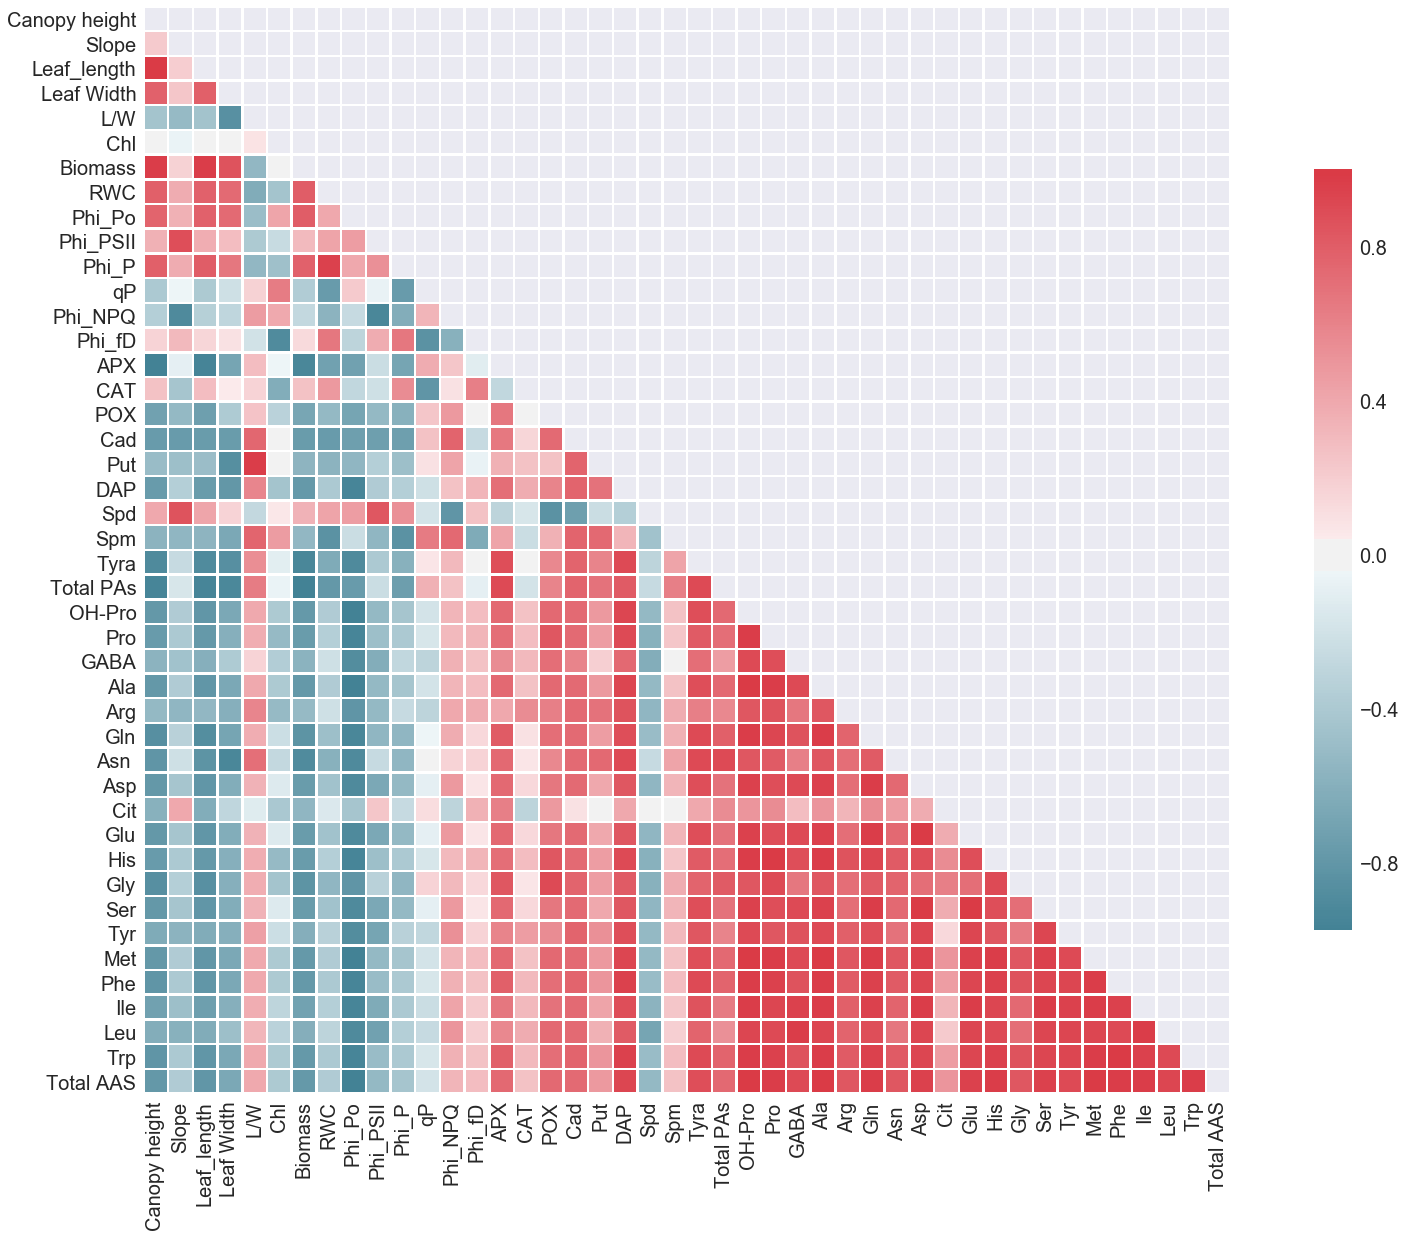

In [21]:
pp = plot(cor,ps,True)
pp = pp.get_figure()
pp.savefig("C:/Users/polami05/Desktop/Significant_Correlation_heatmap_reduced.tiff",dpi=80)

In [22]:

def compute_corr_and_p(df1, df2, method):
    corrs = pd.DataFrame(index=df1.columns, columns=df2.columns, dtype=np.float64)
    pvals = corrs.copy()
  
    if(method=='pearson'):
        for i, j in product(df1.columns, df2.columns):
            corrs.loc[i,j], pvals.loc[i,j] = pearsonr(df1[i], df2[j])
            
    if(method=='spearman'):
        for i, j in product(df1.columns, df2.columns):
            corrs.loc[i,j], pvals.loc[i,j] = spearmanr(df1[i], df2[j])

    return corrs, pvals

def plot(corrs, pvals, significance,siglevel=.05):
   
    if(significance==True):
        
        mask = np.ones_like(corrs, dtype=np.bool)
        
        
        p = pvals.values
        
        for i in range(0,p.shape[0]):
            for j in range(0,p.shape[1]):
                if((p[i,j]<=0.05) & (i!=j)):
                    mask[i,j] = False
    else:
        mask = np.zeros_like(corrs, dtype=np.bool)

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 20))
    sns.set(font_scale=2.0)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    heat = sns.heatmap(corrs,mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, ax=ax,cbar_kws={"shrink": 0.7})
    return heat

In [23]:
cor, ps = compute_corr_and_p(dataa,dataa, 'spearman')

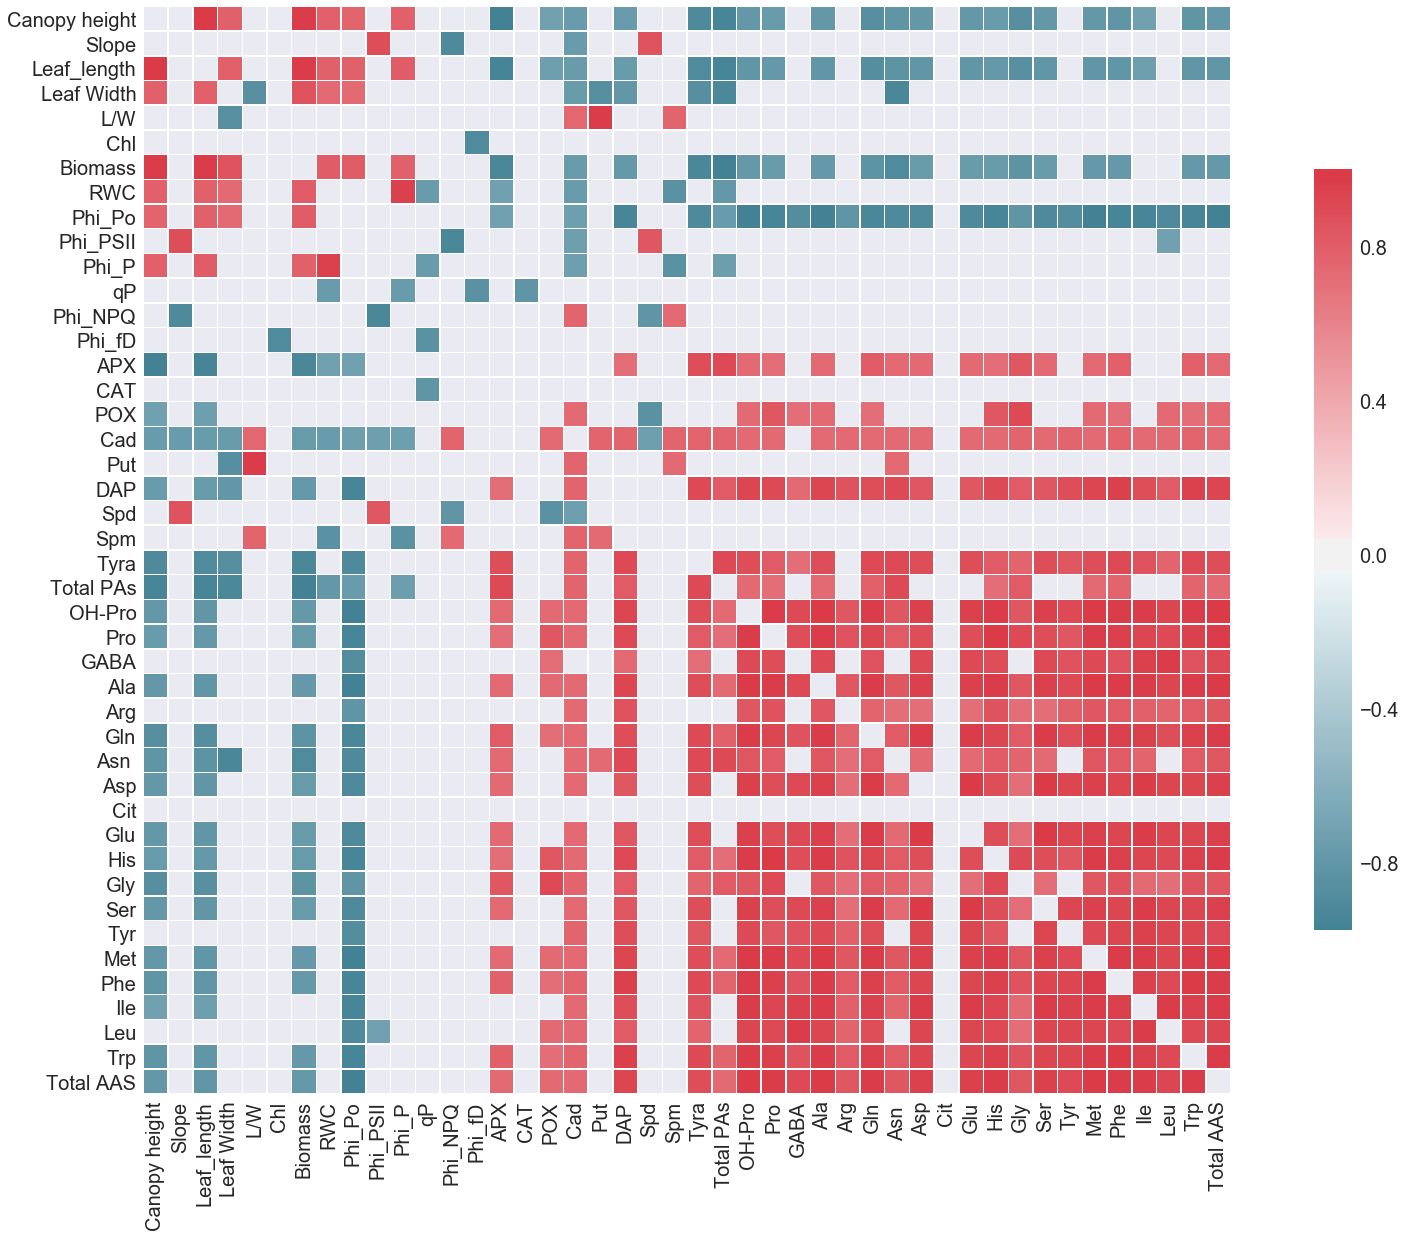

In [25]:
pp = plot(cor,ps,True)
pp = pp.get_figure()
pp.savefig("C:/Users/polami05/Desktop/Significant_Correlation_heatmap.tiff",dpi=80)

In [ ]:
##PCA

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
df = dataa
X=(df-df.mean())/df.std()

In [28]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
projected = pca.fit_transform(X)
projected[:,1] = -1*projected[:,1]

In [30]:
I = np.array(['replicate_1W','replicate_1D','replicate_2W','replicate_2D','replicate_1RW','replicate_1RD','replicate_2RW','replicate_2RD'])
I = pd.Index(I, name="rows")

In [31]:
Scores = pd.DataFrame({'PC1':projected[:,0],'PC2':projected[:,1]}, index=I)

In [33]:
Scores.to_excel('C:/Users/polami05/Desktop/Scores.xlsx')

In [34]:
loadings = pca.components_

In [35]:
I = pd.Index(dataa.columns.values, name="rows")
Load = pd.DataFrame({'PC1':loadings[0],'PC2':loadings[1]}, index=I)

In [36]:
Load.to_excel('C:/Users/polami05/Desktop/Loadings.xlsx')

In [ ]:
#Scatters

In [37]:
data = pd.read_excel('C:/Users/polami05/Desktop/Nuria_paper_analysis/PCA_method.xlsx', index=False)


In [41]:
chos1 = data[['Canopy height','Slope','Leaf_length','Leaf Width','Biomass','RWC','Phi_Po','Phi_PSII','Phi_P','qP','Phi_NPQ','APX','POX','Cad','Spd','Spm','Total PAs']]

In [43]:
chos2 = data[['Canopy height','Cad','DAP','Tyra','OH-Pro','Pro','Ala','Gln','Asp','Asn ','Glu','His','Gly','Ser','Met','Phe','Ile','Trp','Tyr']]

In [57]:
sns.set(style="ticks", color_codes=True)
pp = sns.pairplot(chos1, kind = 'reg', diag_kind = 'kde')
pp.savefig("C:/Users/polami05/Desktop/Scatter_first_group.tiff",dpi=140)